In [1]:
from scipy.stats import norm

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
T = 1.0
nT = 12
dt = T/nT

n = 20000

sigma = 0.2
r = 0.05
K = 1

In [4]:
def bs_digital_call(S=100, K=100, sigma=0.2, r=0.05, T=1):
    d2 = (np.log(S/K) + (r - 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    pv = np.exp(-r * T) * norm.cdf(d2)
    return pv

bs_digital_call()

0.5323248154537634

In [5]:
class EM():
    def __init__(self, r, sigma):
        self.r, self.sigma = r, sigma
    def dS(self, dt, n_steps, n_paths):
        np.random.seed(0)
        return 1 + (self.r - 0 * 0.5 * self.sigma ** 2) * dt + self.sigma * np.sqrt(dt) * np.random.randn(n_steps, n_paths)

In [13]:
class GBM():
    def __init__(self, r, sigma):
        self.r, self.sigma = r, sigma
    def dS(self, dt, n_steps, n_paths):
        np.random.seed(0)
        return np.exp((self.r - 0.5 * self.sigma ** 2) * dt + self.sigma * np.sqrt(dt) * np.random.randn(n_steps, n_paths))

In [7]:
def simulate_asset(asset_model, S, dt, nT, n):
    returns = np.exp(np.cumsum(asset_model.dS(dt, nT, n), axis=0))
    return S * np.cumprod(np.concatenate((np.ones((1, n)), asset_model.dS(dt, nT, n))), axis=0)

In [16]:
def run_monte_carlo(model, seed=1, S=100, r=0.05, sigma=0.20, T=1, n_steps=1, n_paths=1000000):
    dt = T / n_steps
    X = simulate_asset(model(r, sigma), S, dt, n_steps, n_paths)
    final = X[-1]
    payoff = np.where(final > 100, 1, 0)
    discounted_payoffs = np.exp(-r * T) * payoff
    return discounted_payoffs.mean()

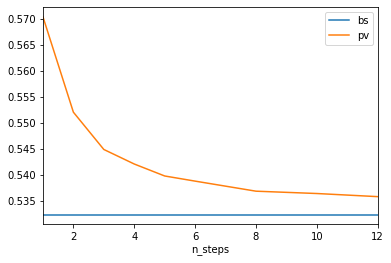

In [17]:
step_ladder = [1, 2, 3, 4, 5, 6, 8, 10, 12]
df = pd.DataFrame([[n_steps, bs_digital_call(), run_monte_carlo(model=EM, n_steps=n_steps)] for n_steps in step_ladder], columns=['n_steps', 'bs', 'pv']).set_index('n_steps')
df.plot();

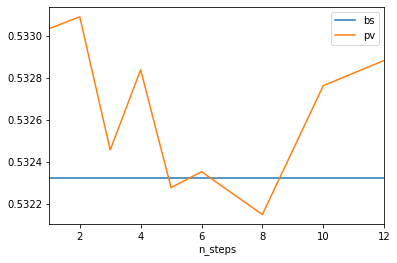

In [18]:
step_ladder = [1, 2, 3, 4, 5, 6, 8, 10, 12]
df = pd.DataFrame([[n_steps, bs_digital_call(), run_monte_carlo(model=GBM, n_steps=n_steps)] for n_steps in step_ladder], columns=['n_steps', 'bs', 'pv']).set_index('n_steps')
df.plot();